## Data Introduction

**Data Set**: Housing cost burden<p>
**Data Source**: [Eurostat](https://ec.europa.eu/eurostat/web/income-and-living-conditions/database)<p>
**Data Description**: The European Union Statistics on Income and Living Conditions (EU-SILC) collects timely and comparable multidimensional microdata on income, poverty, social exclusion and living conditions.
The EU-SILC collection is a key instrument for providing information required by the European Semester and the European Pillar of Social Rights, and the main source of data for microsimulation purposes and flash estimates of income distribution and poverty rates.

In this project, we focus on the data from _Germany_ to do the analysis.<p>
**Time Period**: 2012-2023<p>
**Datasets**: <br>
1. [Housing cost overburden rate by sex](https://ec.europa.eu/eurostat/databrowser/view/tessi160/default/table?lang=en&category=t_ilc.t_ilc_lv.t_ilc_lvho.t_ilc_lvho_hc)<br>
| Sex | Description |
|-----|-------------|
| F   | Female      |
| M   | Male        |
| T   | Total       |

2. ([Housing cost overburden rate by age](https://ec.europa.eu/eurostat/databrowser/view/tessi161/default/table?lang=en&category=t_ilc.t_ilc_lv.t_ilc_lvho.t_ilc_lvho_hc))<br>
| Age Class | Description                          |
|-----------|--------------------------------------|
| TOTAL     | Total                                |
| Y_LT18    | Less than 18 years                   |
| Y18-64    | From 18 to 64 years                  |
| Y_GE65    | 65 years or over                     |
3. [Housing cost overburden rate by income quintile](https://ec.europa.eu/eurostat/databrowser/view/tessi162/default/table?lang=en&category=t_ilc.t_ilc_lv.t_ilc_lvho.t_ilc_lvho_hc)<br>
| Income Quintile | Description                          |
|-----------------|--------------------------------------|
| QU1             | First quintile                       |
| QU2             | Second quintile                      |
| QU3             | Third quintile                       |
| QU4             | Fourth quintile                      |
| QU5             | Fifth quintile                       |
4. [Housing cost overburden rate by poverty status](https://ec.europa.eu/eurostat/databrowser/view/tessi163/default/table?lang=en&category=t_ilc.t_ilc_lv.t_ilc_lvho.t_ilc_lvho_hc)<br>
| Income situation in relation to the risk of poverty threshold | Description                                           |
|--------------------------------------------------------------|-------------------------------------------------------|
| TOTAL                                                        | Total                                                 |
| B_MD60                                                       | Below 60% of the median equivalised income             |
| A_MD60                                                       | Above 60% of the median equivalised income             |
5. [Housing cost overburden rate by tenure status](https://ec.europa.eu/eurostat/databrowser/view/tessi164/default/table?lang=en&category=t_ilc.t_ilc_lv.t_ilc_lvho.t_ilc_lvho_hc)<br>
| Tenure status          | Description                                   |
|------------------------|-----------------------------------------------|
| OWN_L                  | Owner, with a mortgage or loan                |
| OWN_NL                 | Owner, no outstanding mortgage or housing loan|
| RENT_MKT               | Tenant, rent at market price                  |
| RENT_FR                | Tenant, rent at reduced price                |
6. [Housing cost overburden rate by degree of urbanisation](https://ec.europa.eu/eurostat/databrowser/product/view/tessi165?category=t_ilc.t_ilc_lv.t_ilc_lvho.t_ilc_lvho_hc)<br>
| Degree of urbanisation | Description                                   |
|------------------------|-----------------------------------------------|
| DEG1                  | Cities                                         |
| DEG2             | Towns and suburbs                                   |
| DEG3                  | Rural areas                                    |
7. [Housing cost overburden rate by household type](https://ec.europa.eu/eurostat/databrowser/view/tessi166/default/table?lang=en&category=t_ilc.t_ilc_lv.t_ilc_lvho.t_ilc_lvho_hc)<br>
|  Type of household | Description                |
|----------------|--------------------------------|
| A1             | Single person                  |
| A2             | Two adults                     |
| A_GE3          | Three or more adults           |

## Data Preparation 

### Import Libraries

In [1]:
import numpy as np # for numerical operations
import pandas as pd # for data manipulation
import os # for file path operations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn.decomposition import PCA # for dimensionality reduction
from keras.models import Sequential # for model building
from keras.layers import LSTM, Dense # for model building


### Import Data

In [2]:
# define the file directory
file_directory = '/Users/apple/Desktop/project/datasets'
# define the list of file names
file_list = ['Housing cost overburden rate by sex_tessi160_linear.csv', 'Housing cost overburden rate by age group_tessi161_linear.csv', 
             'Housing cost overburden rate by income quintile_tessi162_linear.csv', 'Housing cost overburden rate by poverty status_tessi163_linear.csv', 
             'Housing cost overburden rate by tenure status_tessi164_linear.csv', 'Housing cost overburden rate by degree of urbanisation_tessi165_linear.csv', 
             'Housing cost overburden rate by household type_tessi166_linear.csv']


# create an empty dictionary to store the dataframes
dataframes = {}

# loop through the file list and read each file into a dataframe
for file_name in file_list:
    file_path = os.path.join(file_directory, file_name)
    
    # read the file into a dataframe
    df = pd.read_csv(file_path)
    dataframes[file_name] = df

In [3]:
# name the dataframes for each file
df_rate_sex = dataframes['Housing cost overburden rate by sex_tessi160_linear.csv']
df_rate_age = dataframes['Housing cost overburden rate by age group_tessi161_linear.csv']
df_rate_income = dataframes['Housing cost overburden rate by income quintile_tessi162_linear.csv']
df_rate_poverty = dataframes['Housing cost overburden rate by poverty status_tessi163_linear.csv']
df_rate_tenure = dataframes['Housing cost overburden rate by tenure status_tessi164_linear.csv']
df_rate_urban = dataframes['Housing cost overburden rate by degree of urbanisation_tessi165_linear.csv']
df_rate_household = dataframes['Housing cost overburden rate by household type_tessi166_linear.csv']

### Data Cleaning

In [4]:
# show columns and the first few rows of each dataframe
print(df_rate_sex.head())
print(df_rate_age.head())
print(df_rate_income.head())
print(df_rate_poverty.head())
print(df_rate_tenure.head())
print(df_rate_urban.head())
print(df_rate_household.head())

              DATAFLOW        LAST UPDATE freq unit incgrp    age sex geo  \
0  ESTAT:TESSI160(1.0)  20/09/24 23:00:00    A   PC  TOTAL  TOTAL   F  AL   
1  ESTAT:TESSI160(1.0)  20/09/24 23:00:00    A   PC  TOTAL  TOTAL   F  AL   
2  ESTAT:TESSI160(1.0)  20/09/24 23:00:00    A   PC  TOTAL  TOTAL   F  AL   
3  ESTAT:TESSI160(1.0)  20/09/24 23:00:00    A   PC  TOTAL  TOTAL   F  AL   
4  ESTAT:TESSI160(1.0)  20/09/24 23:00:00    A   PC  TOTAL  TOTAL   F  AL   

   TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         2017        9.1      NaN  
1         2018        6.2      NaN  
2         2019        5.8      NaN  
3         2020        4.0      NaN  
4         2021        3.5      NaN  
              DATAFLOW        LAST UPDATE freq unit incgrp sex    age geo  \
0  ESTAT:TESSI161(1.0)  20/09/24 23:00:00    A   PC  TOTAL   T  TOTAL  AL   
1  ESTAT:TESSI161(1.0)  20/09/24 23:00:00    A   PC  TOTAL   T  TOTAL  AL   
2  ESTAT:TESSI161(1.0)  20/09/24 23:00:00    A   PC  TOTAL   T  TOTAL  AL   
3  ESTA

In [5]:
# show the data types of each column in each dataframe
print(df_rate_sex.describe(include='all'))
print(df_rate_age.describe(include='all'))
print(df_rate_income.describe(include='all'))
print(df_rate_poverty.describe(include='all'))
print(df_rate_tenure.describe(include='all'))
print(df_rate_urban.describe(include='all'))
print(df_rate_household.describe(include='all'))

                   DATAFLOW        LAST UPDATE  freq  unit incgrp    age  \
count                  1365               1365  1365  1365   1365   1365   
unique                    1                  1     1     1      1      1   
top     ESTAT:TESSI160(1.0)  20/09/24 23:00:00     A    PC  TOTAL  TOTAL   
freq                   1365               1365  1365  1365   1365   1365   
mean                    NaN                NaN   NaN   NaN    NaN    NaN   
std                     NaN                NaN   NaN   NaN    NaN    NaN   
min                     NaN                NaN   NaN   NaN    NaN    NaN   
25%                     NaN                NaN   NaN   NaN    NaN    NaN   
50%                     NaN                NaN   NaN   NaN    NaN    NaN   
75%                     NaN                NaN   NaN   NaN    NaN    NaN   
max                     NaN                NaN   NaN   NaN    NaN    NaN   

         sex   geo  TIME_PERIOD    OBS_VALUE OBS_FLAG  
count   1365  1365  1365.000000

In [6]:
# remain only the data from the 'DE' geo
# drop unnecessary columns with only one unique values and 'OBS_FLAG' from each dataframe
df_rate_sex = df_rate_sex[df_rate_sex['geo'] == 'DE']
df_rate_sex.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'incgrp', 'age', 'OBS_FLAG', 'geo'], axis=1, inplace=True)

df_rate_age = df_rate_age[df_rate_age['geo'] == 'DE']
df_rate_age.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'incgrp', 'sex', 'OBS_FLAG', 'geo'], axis=1, inplace=True)

df_rate_income = df_rate_income[df_rate_income['geo'] == 'DE']
df_rate_income.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG', 'geo'], axis=1, inplace=True)

df_rate_poverty = df_rate_poverty[df_rate_poverty['geo'] == 'DE']
df_rate_poverty.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'sex', 'age', 'OBS_FLAG', 'geo'], axis=1, inplace=True)

df_rate_tenure = df_rate_tenure[df_rate_tenure['geo'] == 'DE']
df_rate_tenure.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG', 'geo'], axis=1, inplace=True)

df_rate_urban = df_rate_urban[df_rate_urban['geo'] == 'DE']
df_rate_urban.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG', 'geo'], axis=1, inplace=True)

df_rate_household = df_rate_household[df_rate_household['geo'] == 'DE']
df_rate_household.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'OBS_FLAG', 'geo'],axis=1, inplace=True)


# show the data types of each column in each dataframe
print(df_rate_sex.describe(include='all'))
print(df_rate_age.describe(include='all'))
print(df_rate_income.describe(include='all'))
print(df_rate_poverty.describe(include='all'))
print(df_rate_tenure.describe(include='all'))
print(df_rate_urban.describe(include='all'))
print(df_rate_household.describe(include='all'))

        sex  TIME_PERIOD  OBS_VALUE
count    36     36.00000  36.000000
unique    3          NaN        NaN
top       F          NaN        NaN
freq     12          NaN        NaN
mean    NaN   2017.50000  13.977778
std     NaN      3.50102   2.554896
min     NaN   2012.00000   8.500000
25%     NaN   2014.75000  12.400000
50%     NaN   2017.50000  14.000000
75%     NaN   2020.25000  15.725000
max     NaN   2023.00000  18.000000
          age  TIME_PERIOD  OBS_VALUE
count      48    48.000000  48.000000
unique      4          NaN        NaN
top     TOTAL          NaN        NaN
freq       12          NaN        NaN
mean      NaN  2017.500000  14.114583
std       NaN     3.488583   3.913642
min       NaN  2012.000000   7.900000
25%       NaN  2014.750000  11.300000
50%       NaN  2017.500000  13.850000
75%       NaN  2020.250000  16.000000
max       NaN  2023.000000  22.700000
       quantile  TIME_PERIOD  OBS_VALUE
count        60    60.000000  60.000000
unique        5          NaN    

/var/folders/7x/xdhd27715693yb5v5jhc6rd80000gn/T/ipykernel_3581/4058059492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate_sex.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'incgrp', 'age', 'OBS_FLAG', 'geo'], axis=1, inplace=True)
/var/folders/7x/xdhd27715693yb5v5jhc6rd80000gn/T/ipykernel_3581/4058059492.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate_age.drop(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'incgrp', 'sex', 'OBS_FLAG', 'geo'], axis=1, inplace=True)
/var/folders/7x/xdhd27715693yb5v5jhc6rd80000gn/T/ipykernel_3581/4058059492.py:10: SettingWithCopyWarning: 
A value is trying to be s

In [7]:
# show information of each dataframe
print(df_rate_sex.info())
print(df_rate_age.info())
print(df_rate_income.info())
print(df_rate_poverty.info())
print(df_rate_tenure.info())
print(df_rate_urban.info())
print(df_rate_household.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 77 to 998
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          36 non-null     object 
 1   TIME_PERIOD  36 non-null     int64  
 2   OBS_VALUE    36 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 77 to 1453
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          48 non-null     object 
 1   TIME_PERIOD  48 non-null     int64  
 2   OBS_VALUE    48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 77 to 1908
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   quantile     60 non-null     object 
 1   TIME_PERIOD  60 

All of the dataframes are clean and do not have missing values. They are ready for analysis.

## Data ploting and analysis
### Create plots for various factors

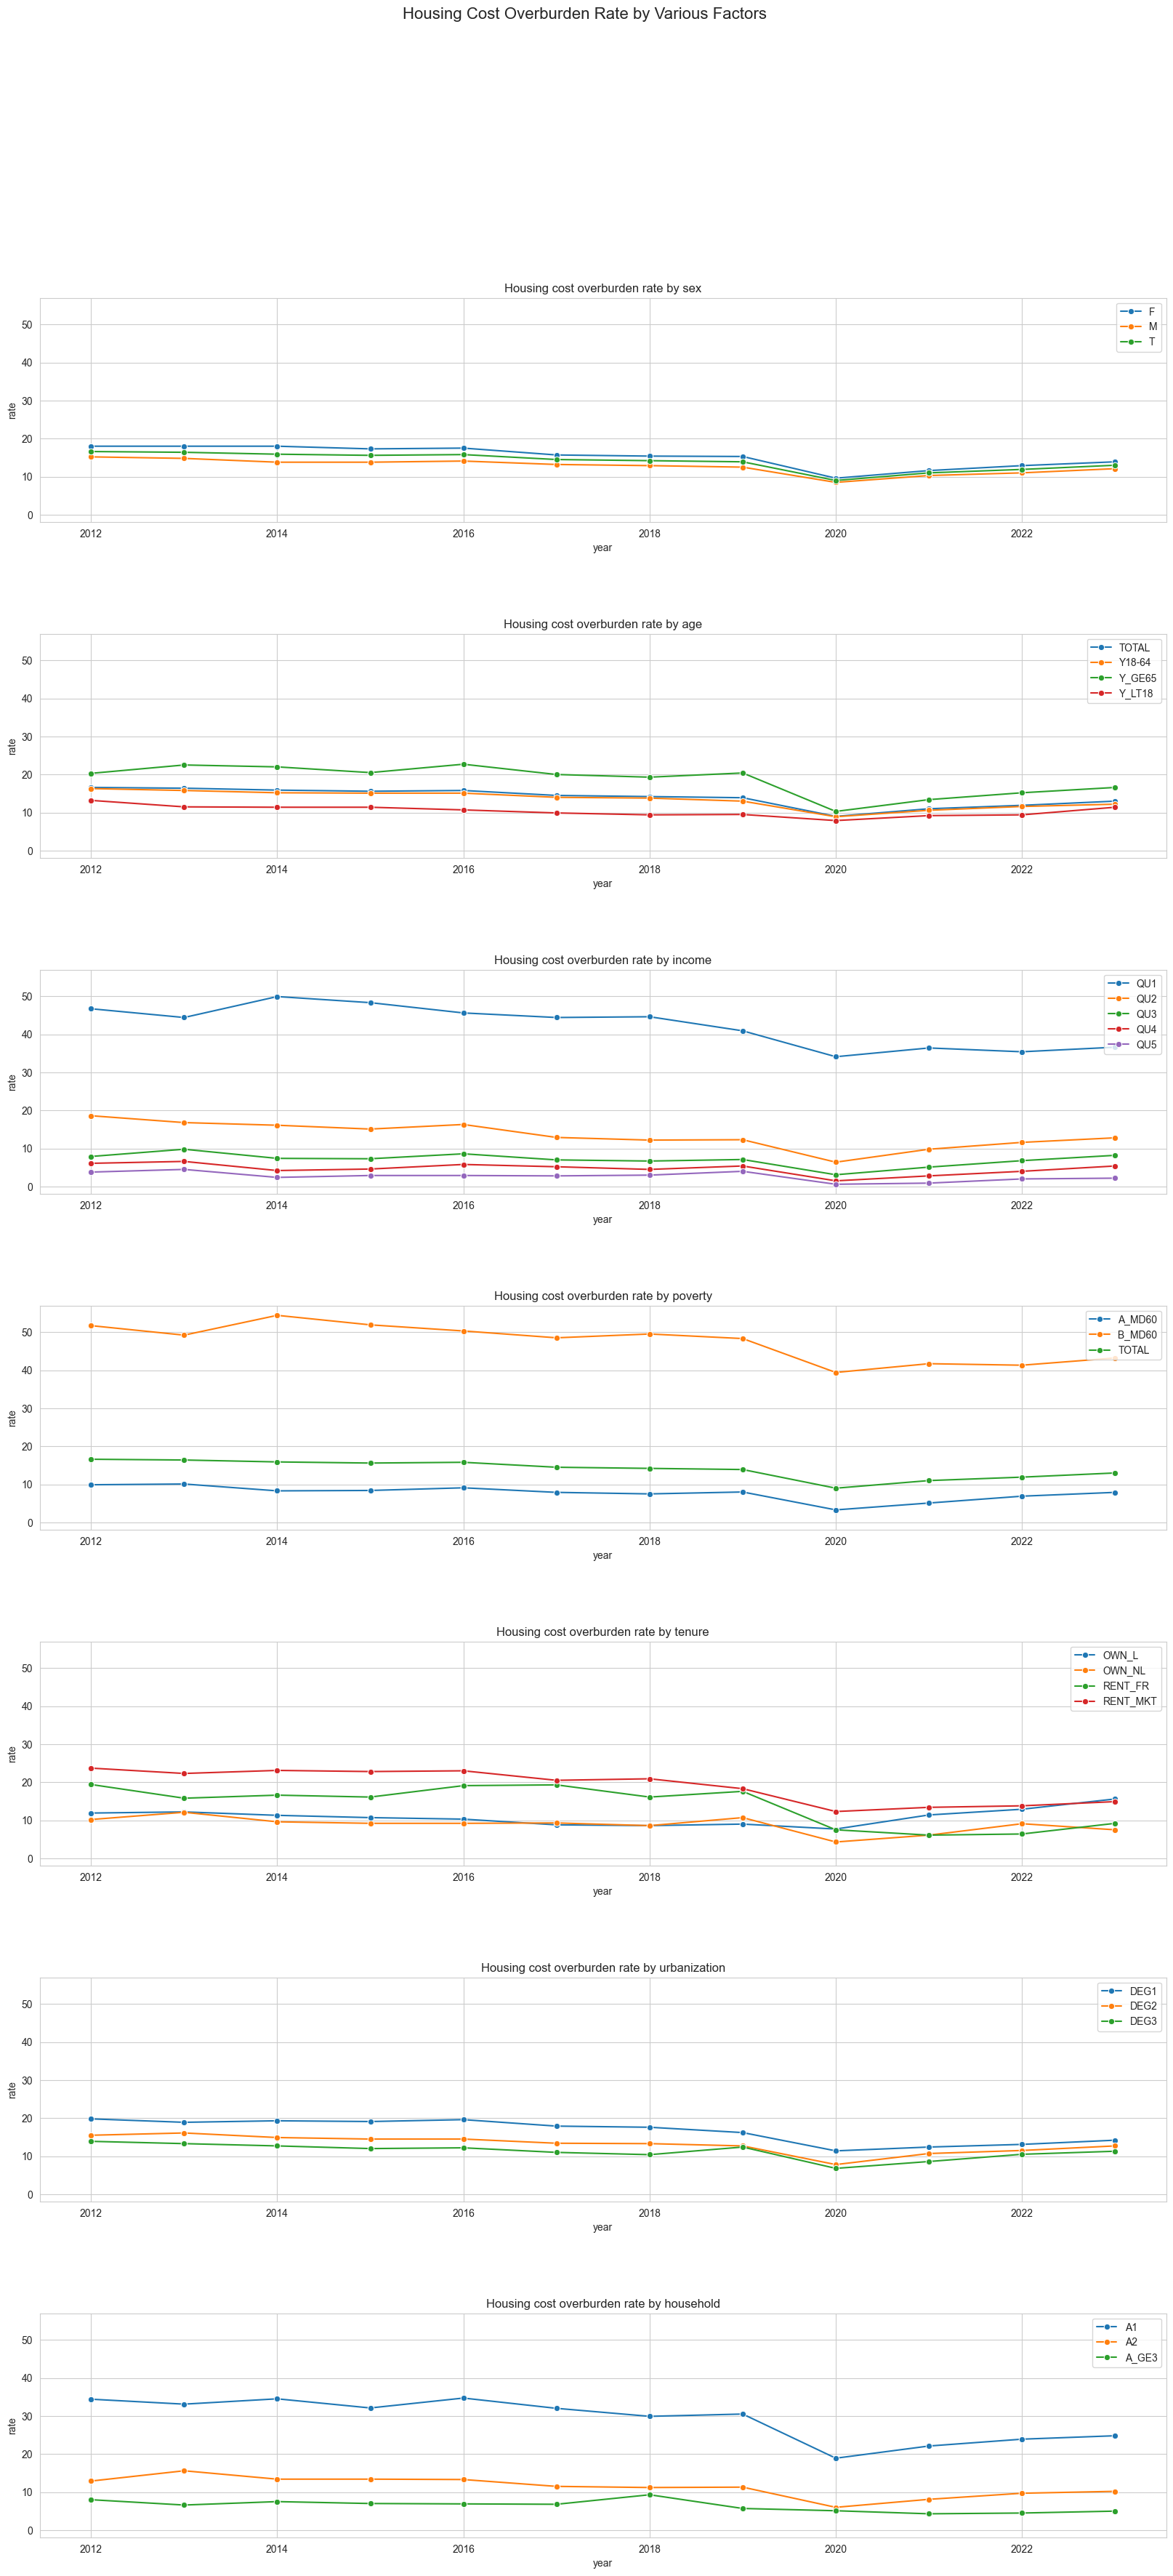

In [8]:
# set the style of the plots
sns.set_style("whitegrid")

# create a figure and axes
fig, axes = plt.subplots(7, 1, figsize=(20, 40))

# set the title of the figure
plt.suptitle('Housing Cost Overburden Rate by Various Factors', fontsize=16)


# plot the data
sns.lineplot(x='TIME_PERIOD', y='OBS_VALUE', hue='sex', data=df_rate_sex, marker='o', ax=axes[0]) # sex dataframe
axes[0].set_title('Housing cost overburden rate by sex') # title of the plot
axes[0].set_xlabel('year') # x-axis label
axes[0].set_ylabel('rate') # y-axis label
axes[0].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='OBS_VALUE', hue='age', data=df_rate_age, marker='o', ax=axes[1]) # age dataframe
axes[1].set_title('Housing cost overburden rate by age') # title of the plot
axes[1].set_xlabel('year') # x-axis label
axes[1].set_ylabel('rate') # y-axis label
axes[1].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='OBS_VALUE', hue='quantile', data=df_rate_income, marker='o', ax=axes[2]) # income dataframe
axes[2].set_title('Housing cost overburden rate by income') # title of the plot
axes[2].set_xlabel('year') # x-axis label
axes[2].set_ylabel('rate') # y-axis label
axes[2].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='OBS_VALUE', hue='incgrp', data=df_rate_poverty, marker='o', ax=axes[3]) # poverty dataframe
axes[3].set_title('Housing cost overburden rate by poverty') # title of the plot
axes[3].set_xlabel('year') # x-axis label
axes[3].set_ylabel('rate') # y-axis label
axes[3].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='OBS_VALUE', hue='tenure', data=df_rate_tenure, marker='o', ax=axes[4]) # tenure dataframe
axes[4].set_title('Housing cost overburden rate by tenure') # title of the plot
axes[4].set_xlabel('year') # x-axis label
axes[4].set_ylabel('rate') # y-axis label
axes[4].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='OBS_VALUE', hue='deg_urb', data=df_rate_urban, marker='o', ax=axes[5]) # urban dataframe
axes[5].set_title('Housing cost overburden rate by urbanization') # title of the plot
axes[5].set_xlabel('year') # x-axis label
axes[5].set_ylabel('rate') # y-axis label
axes[5].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='OBS_VALUE', hue='hhtyp', data=df_rate_household, marker='o', ax=axes[6]) # household dataframe
axes[6].set_title('Housing cost overburden rate by household') # title of the plot
axes[6].set_xlabel('year') # x-axis label
axes[6].set_ylabel('rate') # y-axis label
axes[6].legend(loc='upper right') # legend location

# adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# set the same y-axis limit for all subplots
ylim = [min([ax.get_ylim()[0] for ax in axes.flatten()]),
        max([ax.get_ylim()[1] for ax in axes.flatten()])]

# set the y-axis limit for all subplots
for ax in axes.flatten():
    ax.set_ylim(ylim)

# show the plot
plt.show()

From the lineplots for 7 factors of the housing cost overburden rate, we can see that the rate of housing cost overburden is higher for females, older people, single person, households with lower income, households in poverty, tenant renting with market price, and households in cities. The rate of housing cost overburden is lower for households with owner-occupied housing and households in rural areas and people with higher income. For all of the factors, the rate of housing cost overburden has a significant decrease in the year of 2020. This may be due to the COVID-19 pandemic, which has caused a significant decrease in housing prices and income.

### Using 3-year rolling mean to show the long-term trend of housing cost overburden rate

In [9]:
# calculate 3-year rolling mean
df_rate_sex.loc[:, 'Rolling_Mean'] = df_rate_sex.groupby('sex')['OBS_VALUE'].rolling(window=3).mean().reset_index(level=0, drop=True)
df_rate_age.loc[:, 'Rolling_Mean'] = df_rate_age.groupby('age')['OBS_VALUE'].rolling(window=3).mean().reset_index(level=0, drop=True)
df_rate_income.loc[:, 'Rolling_Mean'] = df_rate_income.groupby('quantile')['OBS_VALUE'].rolling(window=3).mean().reset_index(level=0, drop=True)
df_rate_poverty.loc[:, 'Rolling_Mean'] = df_rate_poverty.groupby('incgrp')['OBS_VALUE'].rolling(window=3).mean().reset_index(level=0, drop=True)
df_rate_tenure.loc[:, 'Rolling_Mean'] = df_rate_tenure.groupby('tenure')['OBS_VALUE'].rolling(window=3).mean().reset_index(level=0, drop=True)
df_rate_urban.loc[:, 'Rolling_Mean'] = df_rate_urban.groupby('deg_urb')['OBS_VALUE'].rolling(window=3).mean().reset_index(level=0, drop=True)
df_rate_household.loc[:, 'Rolling_Mean'] = df_rate_household.groupby('hhtyp')['OBS_VALUE'].rolling(window=3).mean().reset_index(level=0, drop=True)

/var/folders/7x/xdhd27715693yb5v5jhc6rd80000gn/T/ipykernel_3581/623000921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate_sex.loc[:, 'Rolling_Mean'] = df_rate_sex.groupby('sex')['OBS_VALUE'].rolling(window=3).mean().reset_index(level=0, drop=True)
/var/folders/7x/xdhd27715693yb5v5jhc6rd80000gn/T/ipykernel_3581/623000921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate_age.loc[:, 'Rolling_Mean'] = df_rate_age.groupby('age')['OBS_VALUE'].rolling(window=3).mean().reset_index(level=0, dro

#### Show the data

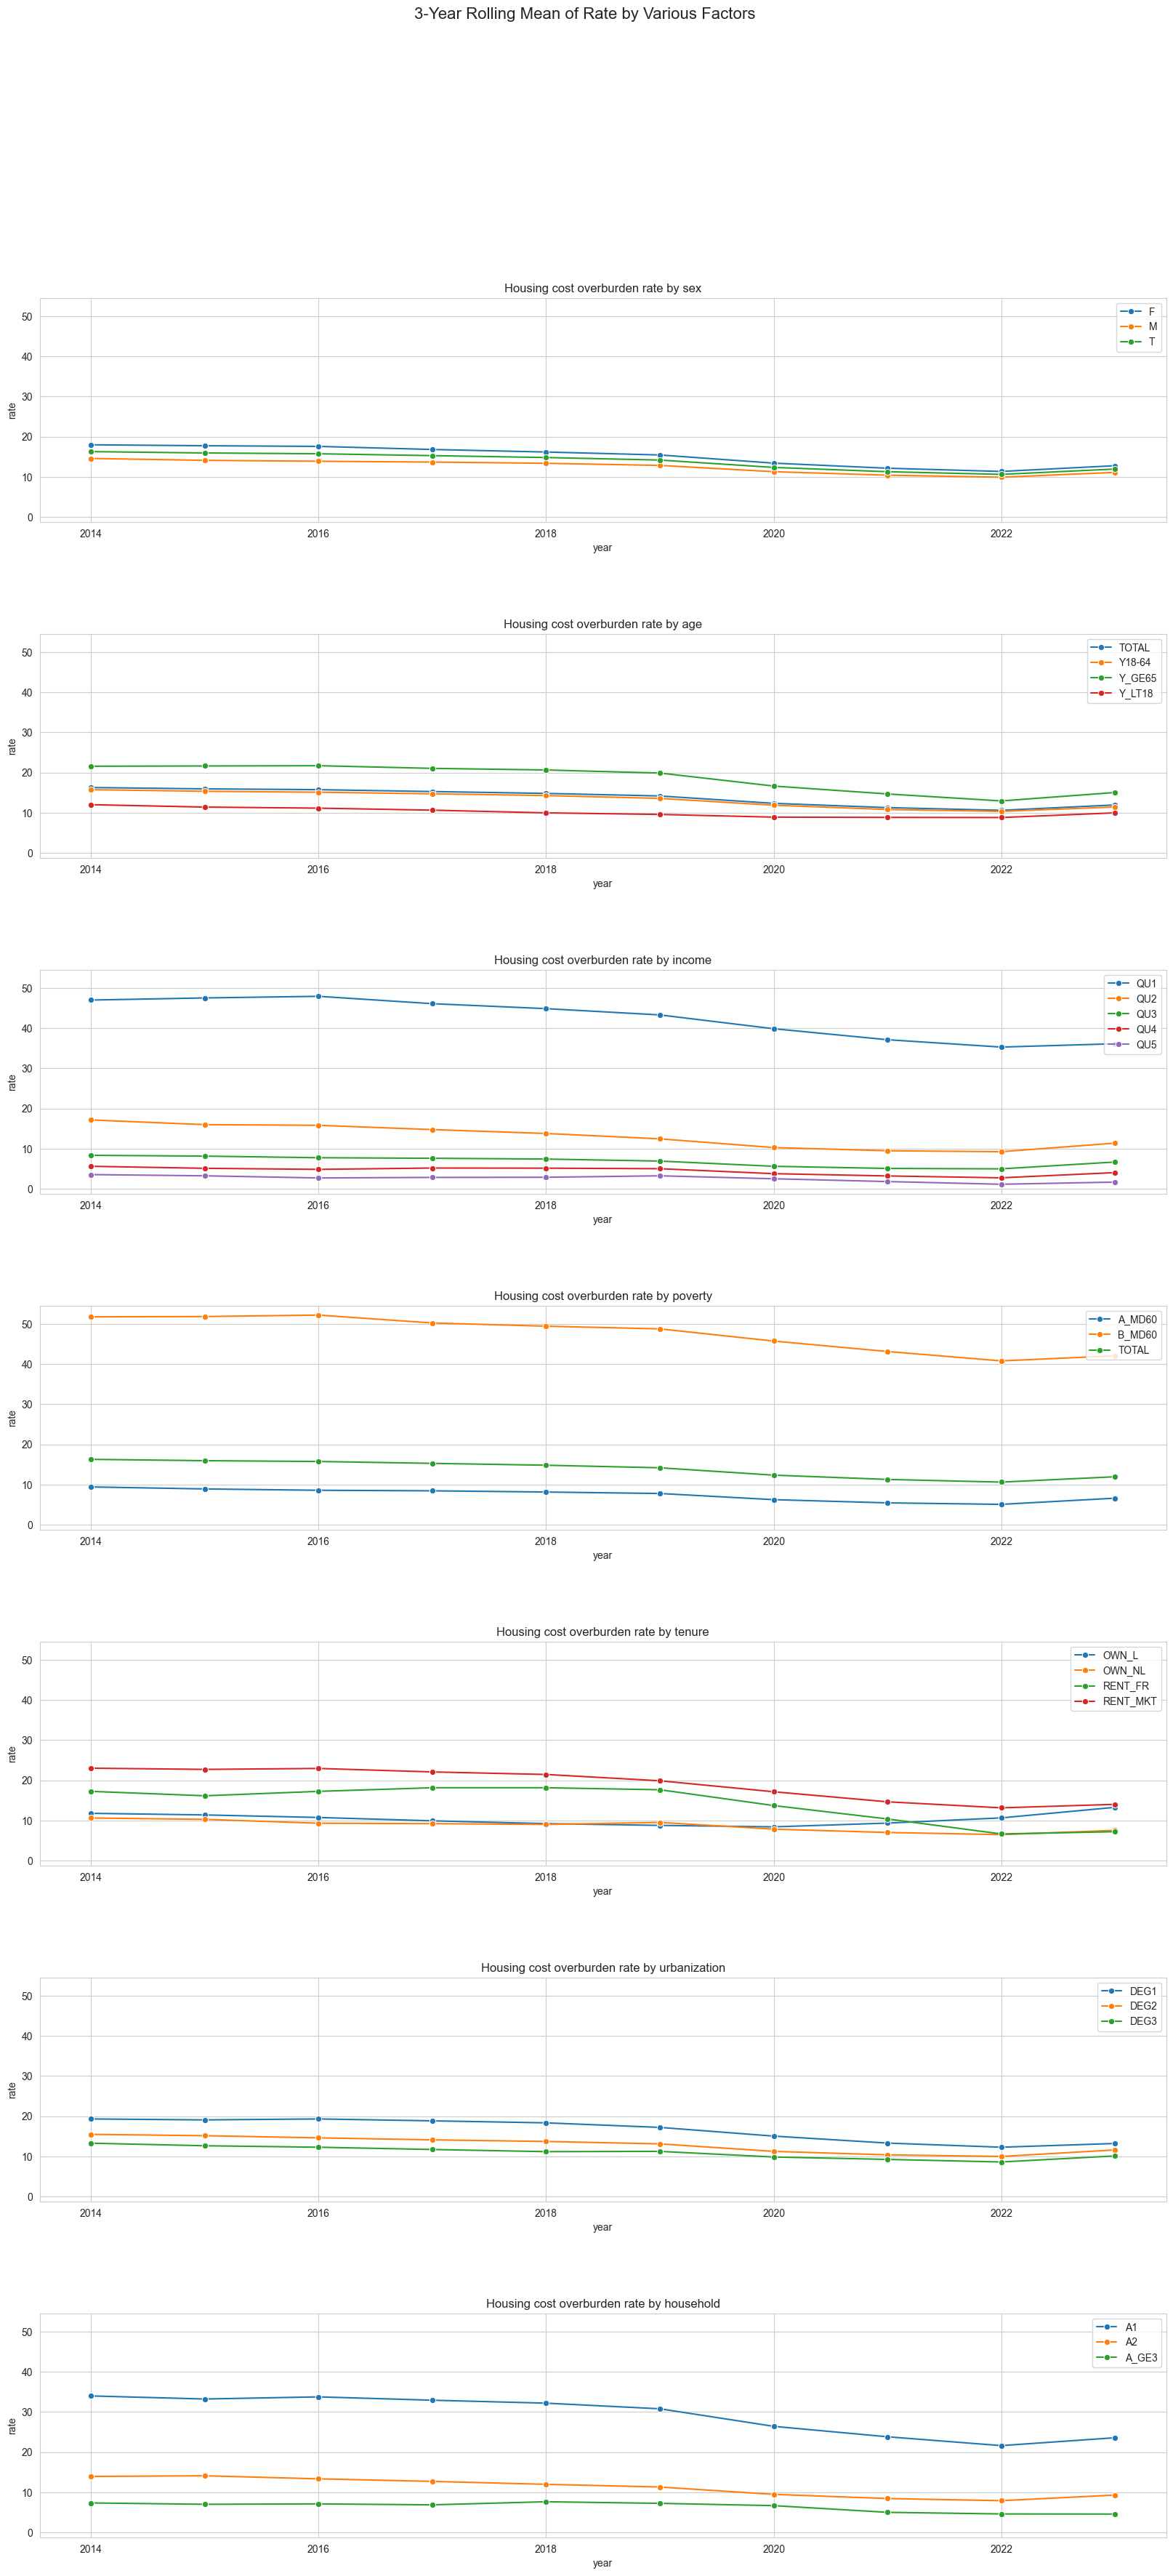

In [10]:
# set the style of the plots
sns.set_style("whitegrid")

# create a figure and axes
fig, axes = plt.subplots(7, 1, figsize=(20, 40))

# set the title of the figure
plt.suptitle('3-Year Rolling Mean of Rate by Various Factors', fontsize=16)


# plot the data
sns.lineplot(x='TIME_PERIOD', y='Rolling_Mean', hue='sex', data=df_rate_sex, marker='o', ax=axes[0]) # sex dataframe
axes[0].set_title('Housing cost overburden rate by sex') # title of the plot
axes[0].set_xlabel('year') # x-axis label
axes[0].set_ylabel('rate') # y-axis label
axes[0].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Rolling_Mean', hue='age', data=df_rate_age, marker='o', ax=axes[1]) # age dataframe
axes[1].set_title('Housing cost overburden rate by age') # title of the plot
axes[1].set_xlabel('year') # x-axis label
axes[1].set_ylabel('rate') # y-axis label
axes[1].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Rolling_Mean', hue='quantile', data=df_rate_income, marker='o', ax=axes[2]) # income dataframe
axes[2].set_title('Housing cost overburden rate by income') # title of the plot
axes[2].set_xlabel('year') # x-axis label
axes[2].set_ylabel('rate') # y-axis label
axes[2].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Rolling_Mean', hue='incgrp', data=df_rate_poverty, marker='o', ax=axes[3]) # poverty dataframe
axes[3].set_title('Housing cost overburden rate by poverty') # title of the plot
axes[3].set_xlabel('year') # x-axis label
axes[3].set_ylabel('rate') # y-axis label
axes[3].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Rolling_Mean', hue='tenure', data=df_rate_tenure, marker='o', ax=axes[4]) # tenure dataframe
axes[4].set_title('Housing cost overburden rate by tenure') # title of the plot
axes[4].set_xlabel('year') # x-axis label
axes[4].set_ylabel('rate') # y-axis label
axes[4].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Rolling_Mean', hue='deg_urb', data=df_rate_urban, marker='o', ax=axes[5]) # urban dataframe
axes[5].set_title('Housing cost overburden rate by urbanization') # title of the plot
axes[5].set_xlabel('year') # x-axis label
axes[5].set_ylabel('rate') # y-axis label
axes[5].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Rolling_Mean', hue='hhtyp', data=df_rate_household, marker='o', ax=axes[6]) # household dataframe
axes[6].set_title('Housing cost overburden rate by household') # title of the plot
axes[6].set_xlabel('year') # x-axis label
axes[6].set_ylabel('rate') # y-axis label
axes[6].legend(loc='upper right') # legend location

# adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# set the same y-axis limit for all subplots
ylim = [min([ax.get_ylim()[0] for ax in axes.flatten()]),
        max([ax.get_ylim()[1] for ax in axes.flatten()])]

# set the y-axis limit for all subplots
for ax in axes.flatten():
    ax.set_ylim(ylim)

# show the plot
plt.show()

From the 3-year rolling mean of the housing cost overburden rate, it can be observed that the rate is generally decreasing over the years. Especially in the last 5 years, the rate has been decreasing significantly. This suggests that the housing cost overburden rate is improving over the years. But after 2022, the rate has been increasing again. This may be due to the COVID-19 pandemic and the subsequent economic downturn.

### Calculating the growth rate of the housing cost overburden rate by various factors

In [11]:
# calculate the growth rate of the housing cost overburden rate
df_rate_sex.loc[:, 'Growth_Rate'] = df_rate_sex.groupby('sex')['OBS_VALUE'].pct_change() * 100 # sex dataframe
df_rate_age.loc[:, 'Growth_Rate'] = df_rate_age.groupby('age')['OBS_VALUE'].pct_change() * 100 # age dataframe
df_rate_income.loc[:, 'Growth_Rate'] = df_rate_income.groupby('quantile')['OBS_VALUE'].pct_change() * 100 # income dataframe
df_rate_poverty.loc[:, 'Growth_Rate'] = df_rate_poverty.groupby('incgrp')['OBS_VALUE'].pct_change() * 100 # poverty dataframe
df_rate_tenure.loc[:, 'Growth_Rate'] = df_rate_tenure.groupby('tenure')['OBS_VALUE'].pct_change() * 100 # tenure dataframe
df_rate_urban.loc[:, 'Growth_Rate'] = df_rate_urban.groupby('deg_urb')['OBS_VALUE'].pct_change() * 100 # urban dataframe
df_rate_household.loc[:, 'Growth_Rate'] = df_rate_household.groupby('hhtyp')['OBS_VALUE'].pct_change() * 100 # household dataframe


/var/folders/7x/xdhd27715693yb5v5jhc6rd80000gn/T/ipykernel_3581/3558247461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate_sex.loc[:, 'Growth_Rate'] = df_rate_sex.groupby('sex')['OBS_VALUE'].pct_change() * 100 # sex dataframe
/var/folders/7x/xdhd27715693yb5v5jhc6rd80000gn/T/ipykernel_3581/3558247461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate_age.loc[:, 'Growth_Rate'] = df_rate_age.groupby('age')['OBS_VALUE'].pct_change() * 100 # age dataframe
/var/folders/7x/xdhd27715693yb5v5jhc

#### Show the data

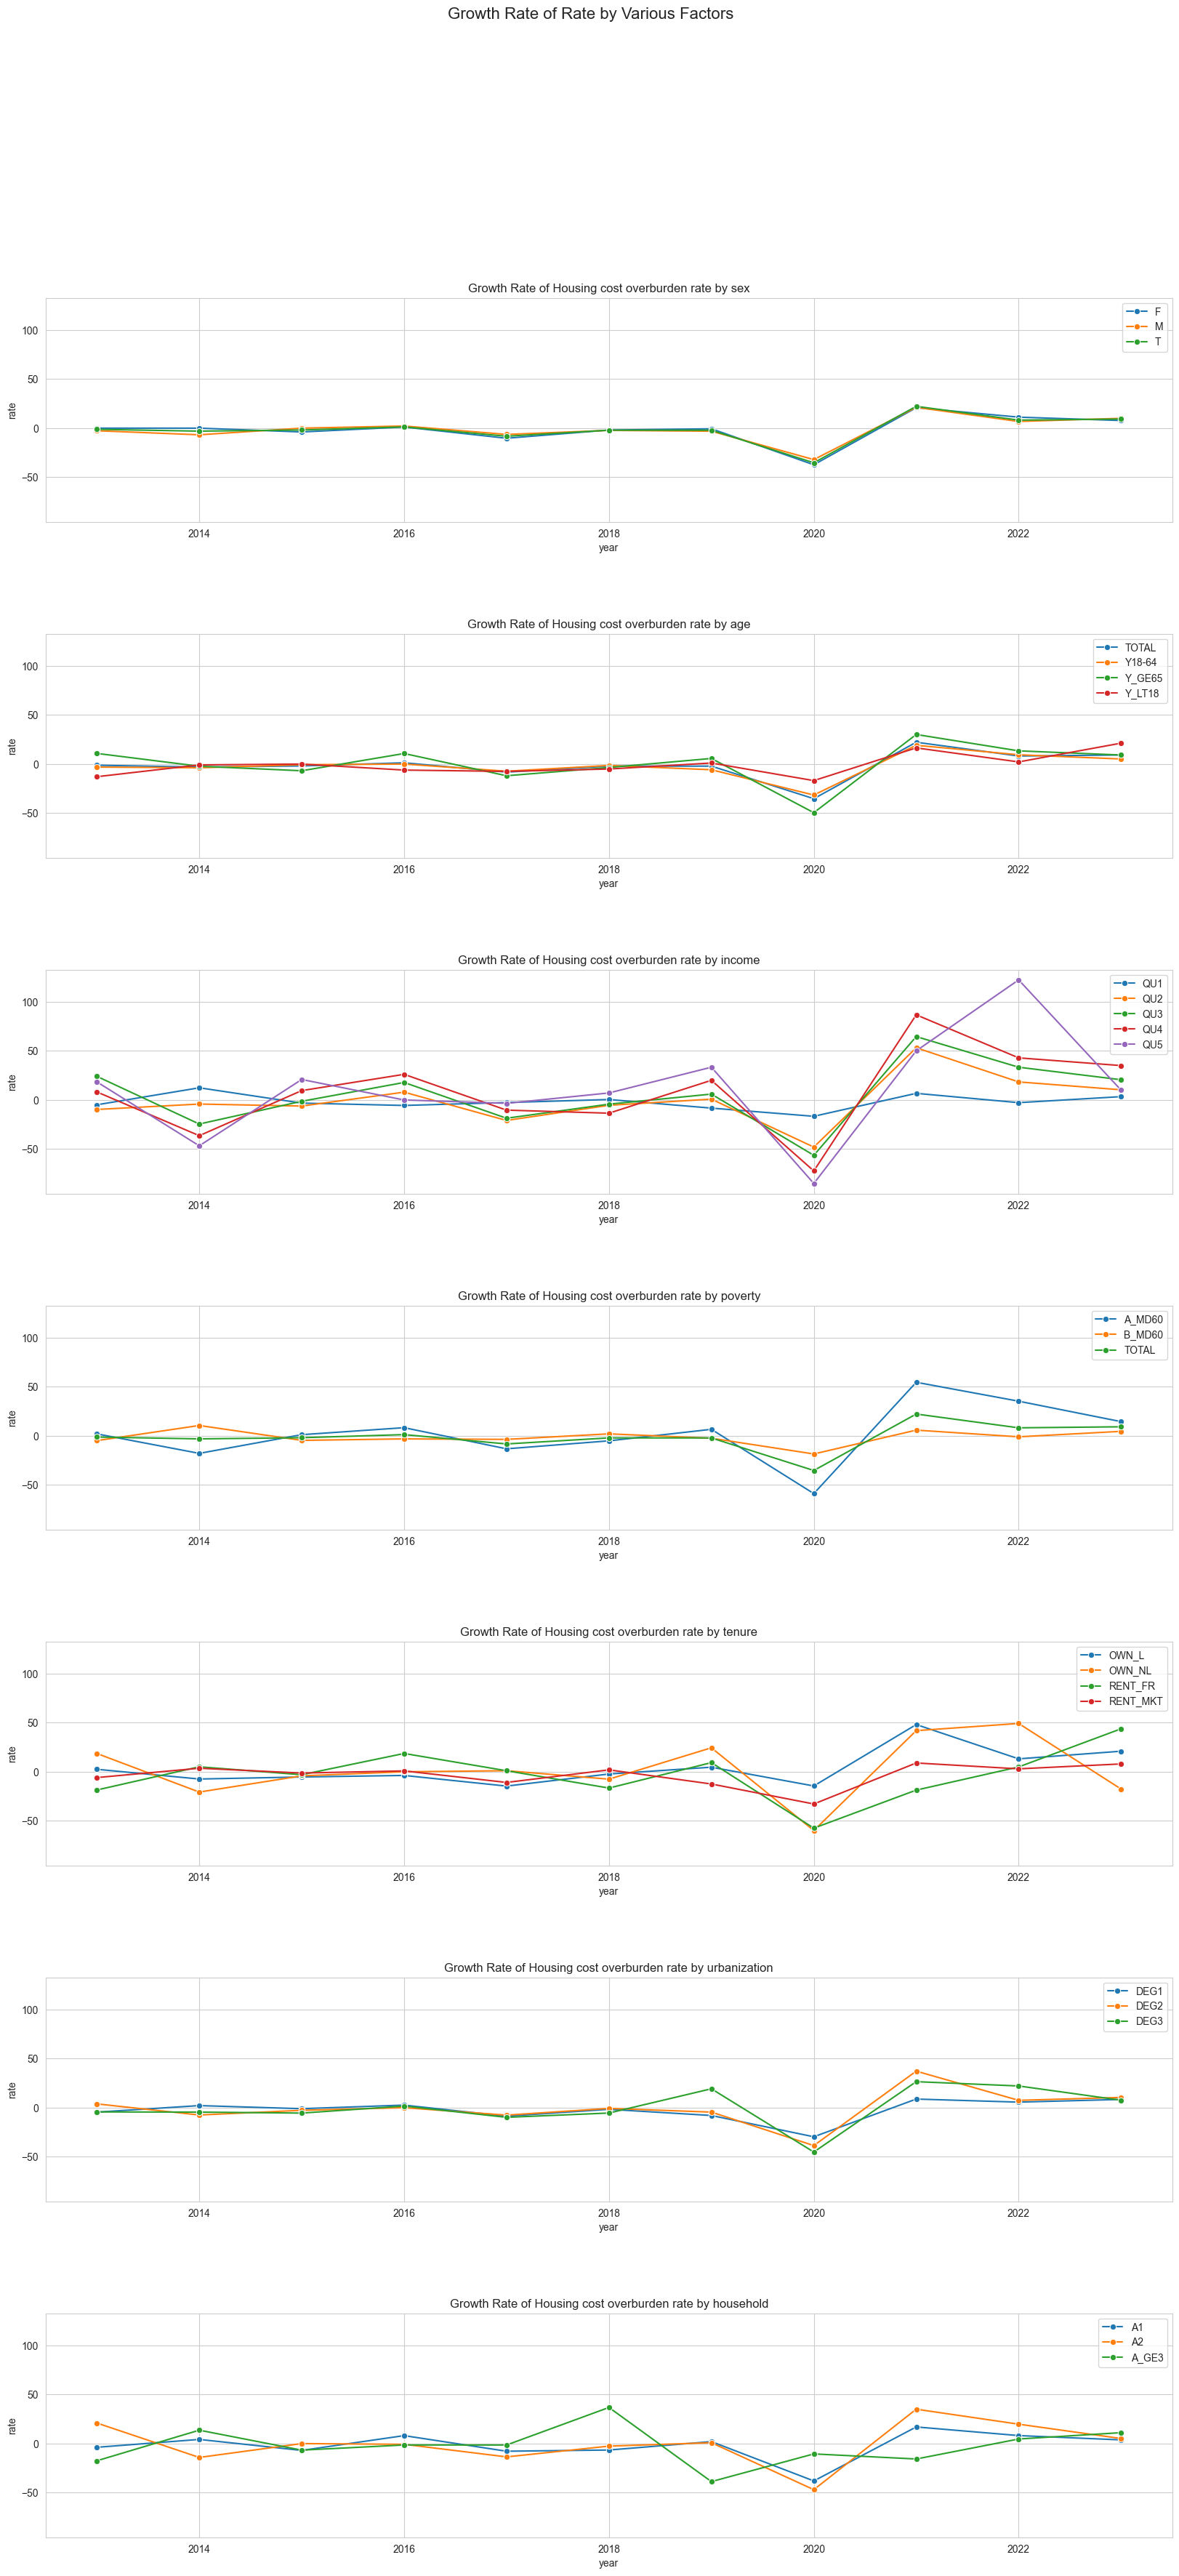

In [12]:
# set the style of the plots
sns.set_style("whitegrid")

# create a figure and axes
fig, axes = plt.subplots(7, 1, figsize=(20, 40))

# set the title of the figure
plt.suptitle('Growth Rate of Rate by Various Factors', fontsize=16)

# plot the data
sns.lineplot(x='TIME_PERIOD', y='Growth_Rate', hue='sex', data=df_rate_sex, marker='o', ax=axes[0]) # sex dataframe
axes[0].set_title('Growth Rate of Housing cost overburden rate by sex') # title of the plot
axes[0].set_xlabel('year') # x-axis label
axes[0].set_ylabel('rate') # y-axis label
axes[0].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Growth_Rate', hue='age', data=df_rate_age, marker='o', ax=axes[1]) # age dataframe
axes[1].set_title('Growth Rate of Housing cost overburden rate by age') # title of the plot
axes[1].set_xlabel('year') # x-axis label
axes[1].set_ylabel('rate') # y-axis label
axes[1].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Growth_Rate', hue='quantile', data=df_rate_income, marker='o', ax=axes[2]) # income dataframe
axes[2].set_title('Growth Rate of Housing cost overburden rate by income') # title of the plot
axes[2].set_xlabel('year') # x-axis label
axes[2].set_ylabel('rate') # y-axis label
axes[2].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Growth_Rate', hue='incgrp', data=df_rate_poverty, marker='o', ax=axes[3]) # poverty dataframe
axes[3].set_title('Growth Rate of Housing cost overburden rate by poverty') # title of the plot
axes[3].set_xlabel('year') # x-axis label
axes[3].set_ylabel('rate') # y-axis label
axes[3].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Growth_Rate', hue='tenure', data=df_rate_tenure, marker='o', ax=axes[4]) # tenure dataframe
axes[4].set_title('Growth Rate of Housing cost overburden rate by tenure') # title of the plot
axes[4].set_xlabel('year') # x-axis label
axes[4].set_ylabel('rate') # y-axis label
axes[4].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Growth_Rate', hue='deg_urb', data=df_rate_urban, marker='o', ax=axes[5]) # urban dataframe
axes[5].set_title('Growth Rate of Housing cost overburden rate by urbanization') # title of the plot
axes[5].set_xlabel('year') # x-axis label
axes[5].set_ylabel('rate') # y-axis label
axes[5].legend(loc='upper right') # legend location

sns.lineplot(x='TIME_PERIOD', y='Growth_Rate', hue='hhtyp', data=df_rate_household, marker='o', ax=axes[6]) # household dataframe
axes[6].set_title('Growth Rate of Housing cost overburden rate by household') # title of the plot
axes[6].set_xlabel('year') # x-axis label
axes[6].set_ylabel('rate') # y-axis label
axes[6].legend(loc='upper right') # legend location

# adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# set the same y-axis limit for all subplots
ylim = [min([ax.get_ylim()[0] for ax in axes.flatten()]),
        max([ax.get_ylim()[1] for ax in axes.flatten()])]

# set the y-axis limit for all subplots
for ax in axes.flatten():
    ax.set_ylim(ylim)

# show the plot
plt.show()

From the growth rate of housing cost overburden rate by various factors, it can be observed that income, poverty, and tenure have the highest growth rate and urbanization has the lowest growth rate. This suggests that income, poverty, and tenure are the main factors that contribute to the growth of housing cost overburden rate, while the other factors do not have a significant impact on it. The fifth quintile income people have huge rate increased after the year 2020, which is over 100% increase.

### Concatenate dataframes


In [14]:
# delete the columns that are not needed
df_rate_sex.drop(columns = ['Rolling_Mean', 'Growth_Rate'], inplace=True)
df_rate_age.drop(columns = ['Rolling_Mean', 'Growth_Rate'], inplace=True)
df_rate_income.drop(columns = ['Rolling_Mean', 'Growth_Rate'], inplace=True)
df_rate_poverty.drop(columns = ['Rolling_Mean', 'Growth_Rate'], inplace=True)
df_rate_tenure.drop(columns = ['Rolling_Mean', 'Growth_Rate'], inplace=True)
df_rate_urban.drop(columns = ['Rolling_Mean', 'Growth_Rate'], inplace=True)
df_rate_household.drop(columns = ['Rolling_Mean', 'Growth_Rate'], inplace=True)

/var/folders/7x/xdhd27715693yb5v5jhc6rd80000gn/T/ipykernel_3581/1482983938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate_sex.drop(columns = ['Rolling_Mean', 'Growth_Rate'], inplace=True)
/var/folders/7x/xdhd27715693yb5v5jhc6rd80000gn/T/ipykernel_3581/1482983938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate_age.drop(columns = ['Rolling_Mean', 'Growth_Rate'], inplace=True)
/var/folders/7x/xdhd27715693yb5v5jhc6rd80000gn/T/ipykernel_3581/1482983938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [16]:
# reset the orgnization of the dataframes
# sex dataframe
df_pivot_sex = df_rate_sex.pivot(index='TIME_PERIOD', columns='sex', values='OBS_VALUE') # reset the orgnization of the dataframes
df_pivot_sex.reset_index(inplace=True) # reset the index
df_pivot_sex.columns.name = None # remove the column name
df_pivot_sex.rename(columns={
    'F': 'sex_F',
    'M': 'sex_M',
    'T': 'sex_T'
}, inplace=True) # rename the columns

# age dataframe
df_pivot_age = df_rate_age.pivot(index='TIME_PERIOD', columns='age', values='OBS_VALUE') # reset the orgnization of the dataframes
df_pivot_age.reset_index(inplace=True) # reset the index
df_pivot_age.columns.name = None # remove the column name
df_pivot_age.rename(columns={
    'TOTAL': 'age_TOTAL',
    'Y18-64': 'age_Y18-64',
    'Y_GE65': 'age_Y_GE65',
    'Y_LT18': 'age_Y_LT18'
}, inplace=True) # rename the columns

# income dataframe
df_pivot_income = df_rate_income.pivot(index='TIME_PERIOD', columns='quantile', values='OBS_VALUE') # reset the orgnization of the dataframes
df_pivot_income.reset_index(inplace=True) # reset the index
df_pivot_income.columns.name = None # remove the column name
df_pivot_income.rename(columns={
    'QU1': 'income_QU1',
    'QU2': 'income_QU2',
    'QU3': 'income_QU3',
    'QU4': 'income_QU4',
    'QU5': 'income_QU5'
}, inplace=True) # rename the columns

# poverty dataframe
df_pivot_poverty = df_rate_poverty.pivot(index='TIME_PERIOD', columns='incgrp', values='OBS_VALUE') # reset the orgnization of the dataframes
df_pivot_poverty.reset_index(inplace=True) # reset the index
df_pivot_poverty.columns.name = None # remove the column name
df_pivot_poverty.rename(columns={
    'A_MD60': 'poverty_A_MD60',
    'B_MD60': 'poverty_B_MD60',
    'TOTAL': 'poverty_TOTAL'
}, inplace=True) # rename the columns

# tenure dataframe
df_pivot_tenure = df_rate_tenure.pivot(index='TIME_PERIOD', columns='tenure', values='OBS_VALUE') # reset the orgnization of the dataframes
df_pivot_tenure.reset_index(inplace=True) # reset the index
df_pivot_tenure.columns.name = None # remove the column name
df_pivot_tenure.rename(columns={
    'OWN_L': 'tenure_OWN_L', 
    'OWN_NL': 'tenure_OWN_NL', 
    'RENT_FR': 'tenure_RENT_FR', 
    'RENT_MKT': 'tenure_OWN'
}, inplace=True) # rename the columns

# urbanization dataframe
df_pivot_urban = df_rate_urban.pivot(index='TIME_PERIOD', columns='deg_urb', values='OBS_VALUE') # reset the orgnization of the dataframes
df_pivot_urban.reset_index(inplace=True) # reset the index
df_pivot_urban.columns.name = None # remove the column name
df_pivot_urban.rename(columns={
    'DEG1': 'urban_DEG1',
    'DEG2': 'urban_DEG2',
    'DEG3': 'urban_DEG3'
}, inplace=True) # rename the columns

# household dataframe
df_pivot_household = df_rate_household.pivot(index='TIME_PERIOD', columns='hhtyp', values='OBS_VALUE') # reset the orgnization of the dataframes
df_pivot_household.reset_index(inplace=True) # reset the index
df_pivot_household.columns.name = None # remove the column name
df_pivot_household.rename(columns={
    'A1': 'household_A1',
    'A2': 'household_A2',
    'A_GE3': 'household_A_GE3'
}, inplace=True) # rename the columns

In [18]:
# combine all the dataframes into one
df_combined = pd.concat([df_pivot_sex.set_index('TIME_PERIOD'), 
                         df_pivot_age.set_index('TIME_PERIOD'), 
                         df_pivot_income.set_index('TIME_PERIOD'),
                         df_pivot_poverty.set_index('TIME_PERIOD'),
                         df_pivot_tenure.set_index('TIME_PERIOD'),
                         df_pivot_urban.set_index('TIME_PERIOD'),
                         df_pivot_household.set_index('TIME_PERIOD')], axis=1)

# reset the index of the combined dataframe with 'TIME_PERIOD'
df_combined.reset_index(inplace=True)

In [19]:
# show the data
df_combined 

,TIME_PERIOD,sex_F,sex_M,sex_T,age_TOTAL,age_Y18-64,age_Y_GE65,age_Y_LT18,income_QU1,income_QU2,...,tenure_OWN_L,tenure_OWN_NL,tenure_RENT_FR,tenure_OWN,urban_DEG1,urban_DEG2,urban_DEG3,household_A1,household_A2,household_A_GE3
0,2012,18.0,15.2,16.6,16.6,16.3,20.3,13.2,46.7,18.6,...,11.9,10.2,19.4,23.7,19.8,15.5,13.9,34.4,12.9,8.0
1,2013,18.0,14.8,16.4,16.4,15.8,22.5,11.5,44.4,16.8,...,12.2,12.1,15.8,22.3,18.9,16.1,13.3,33.1,15.6,6.6
2,2014,18.0,13.8,15.9,15.9,15.2,22.0,11.4,49.9,16.1,...,11.3,9.6,16.6,23.1,19.3,14.9,12.7,34.5,13.4,7.5
3,2015,17.3,13.8,15.6,15.6,15.1,20.5,11.4,48.3,15.1,...,10.7,9.2,16.1,22.8,19.1,14.5,12.0,32.1,13.4,7.0
4,2016,17.5,14.1,15.8,15.8,15.1,22.7,10.7,45.6,16.3,...,10.3,9.2,19.1,23.0,19.6,14.5,12.2,34.7,13.3,6.9
5,2017,15.7,13.2,14.5,14.5,14.0,20.0,9.9,44.4,12.9,...,8.8,9.3,19.3,20.5,17.9,13.4,11.0,32.0,11.5,6.8
6,2018,15.4,12.9,14.2,14.2,13.8,19.3,9.4,44.6,12.2,...,8.6,8.6,16.1,20.9,17.6,13.3,10.4,29.9,11.2,9.3
7,2019,15.3,12.5,13.9,13.9,13.0,20.4,9.5,40.9,12.3,...,9.0,10.7,17.6,18.3,16.2,12.7,12.4,30.5,11.3,5.7
8,2020,9.6,8.5,9.0,9.0,8.9,10.3,7.9,34.1,6.4,...,7.7,4.3,7.5,12.3,11.4,7.8,6.8,18.9,6.0,5.1
9,2021,11.6,10.3,11.0,11.0,10.6,13.4,9.2,36.4,9.8,...,11.4,6.1,6.1,13.4,12.4,10.7,8.6,22.1,8.1,4.3


### Correlation Matrix

In [20]:
correlation_matrix = df_combined.corr()
print(correlation_matrix)

                 TIME_PERIOD     sex_F     sex_M     sex_T  age_TOTAL  \
TIME_PERIOD         1.000000 -0.822901 -0.802438 -0.816973  -0.816973   
sex_F              -0.822901  1.000000  0.982307  0.996694   0.996694   
sex_M              -0.802438  0.982307  1.000000  0.994044   0.994044   
sex_T              -0.816973  0.996694  0.994044  1.000000   1.000000   
age_TOTAL          -0.816973  0.996694  0.994044  1.000000   1.000000   
age_Y18-64         -0.848202  0.990885  0.992471  0.995862   0.995862   
age_Y_GE65         -0.728072  0.967988  0.940101  0.960851   0.960851   
age_Y_LT18         -0.661581  0.801018  0.842961  0.820049   0.820049   
income_QU1         -0.865332  0.916689  0.863944  0.901133   0.901133   
income_QU2         -0.786681  0.953008  0.966590  0.960777   0.960777   
income_QU3         -0.486577  0.833399  0.865816  0.848394   0.848394   
income_QU4         -0.512281  0.819901  0.882015  0.847881   0.847881   
income_QU5         -0.637183  0.817054  0.849461  0

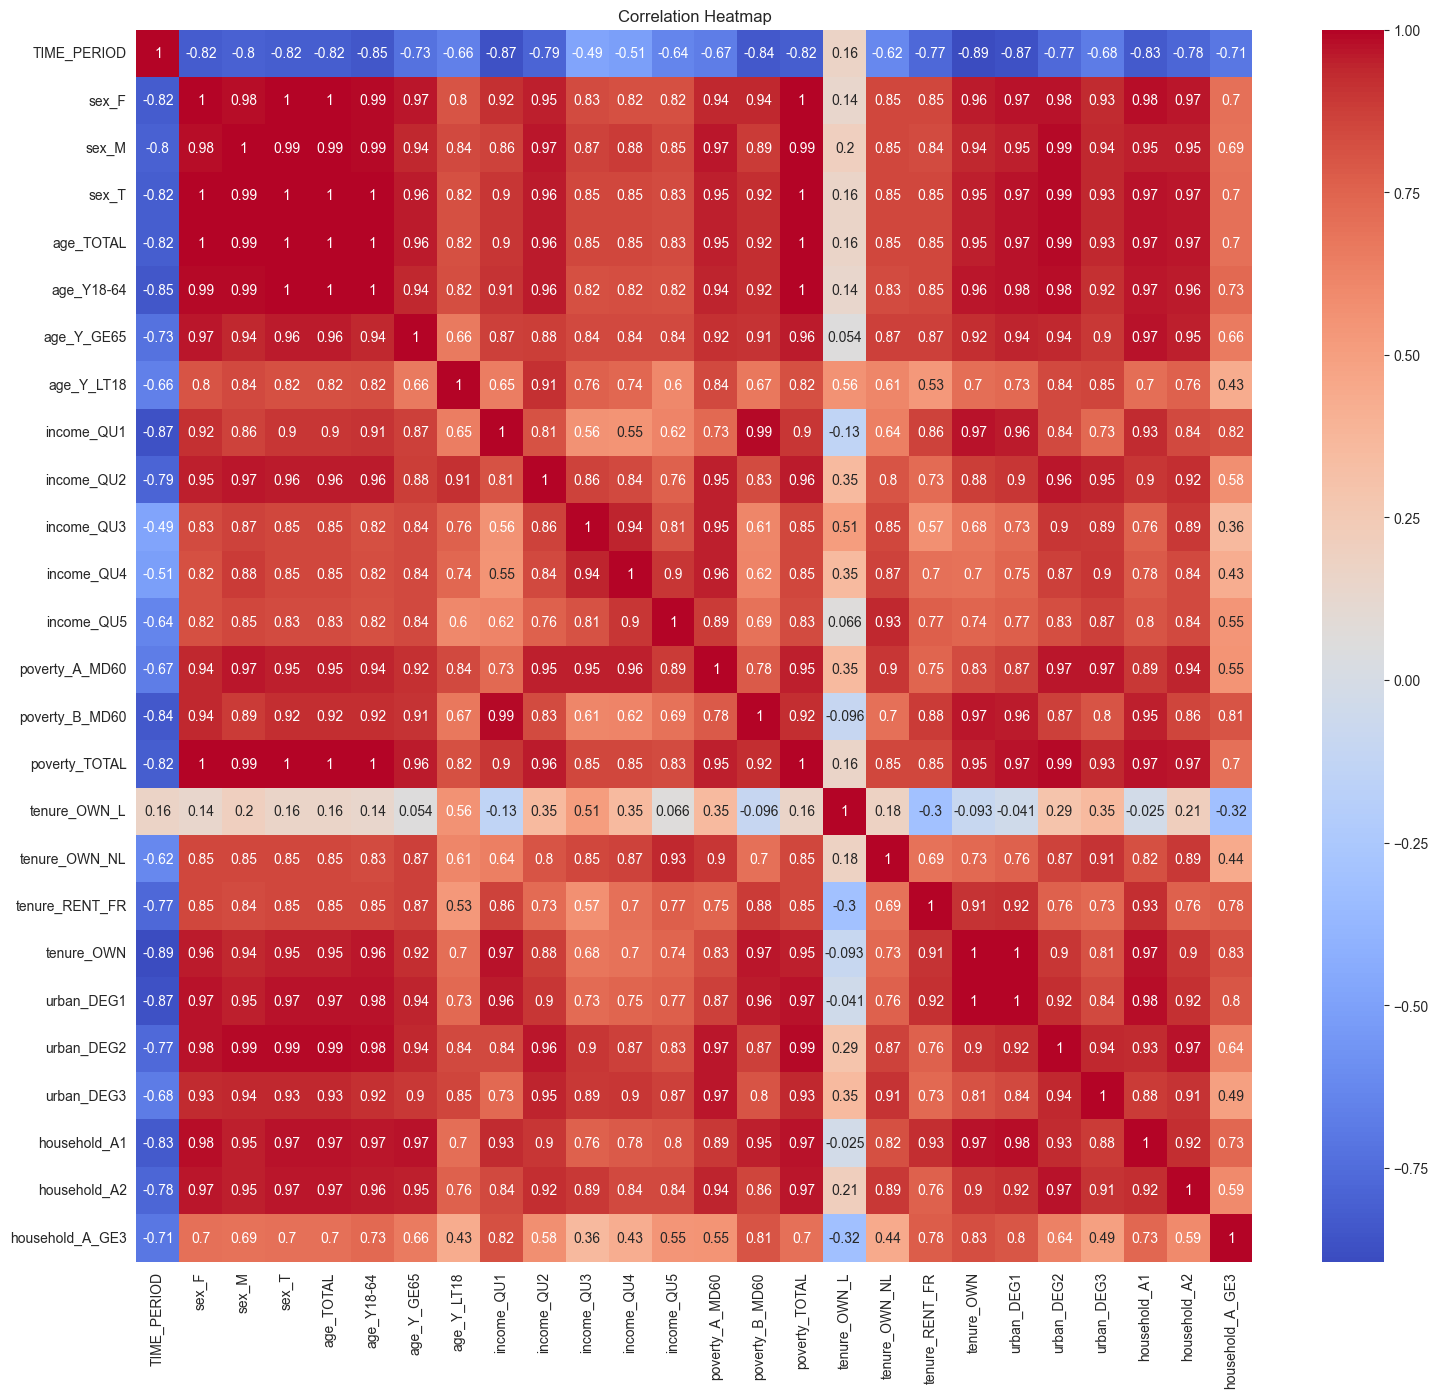

In [21]:
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the heatmap for correlation matrix of the so many variables, it shows that most of the variables have a strong correlation with each other. The correlation between the variables is high, which means that the variables are highly correlated with each other. This means that if one variable increases, the other variables are likely to increase or decrease in a similar manner.

In [22]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TIME_PERIOD      12 non-null     int64  
 1   sex_F            12 non-null     float64
 2   sex_M            12 non-null     float64
 3   sex_T            12 non-null     float64
 4   age_TOTAL        12 non-null     float64
 5   age_Y18-64       12 non-null     float64
 6   age_Y_GE65       12 non-null     float64
 7   age_Y_LT18       12 non-null     float64
 8   income_QU1       12 non-null     float64
 9   income_QU2       12 non-null     float64
 10  income_QU3       12 non-null     float64
 11  income_QU4       12 non-null     float64
 12  income_QU5       12 non-null     float64
 13  poverty_A_MD60   12 non-null     float64
 14  poverty_B_MD60   12 non-null     float64
 15  poverty_TOTAL    12 non-null     float64
 16  tenure_OWN_L     12 non-null     float64
 17  tenure_OWN_NL    1

### PCA

In [23]:

# 假设 df 是你的数据集，并且已经去除了不需要的列（如时间列）
X = df_combined.drop(columns=['TIME_PERIOD'])  # 保留所有数值型特征

# 标准化数据 (PCA对特征的大小敏感，所以通常需要标准化数据)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 初始化PCA模型，保留两个主成分
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)



In [24]:
# 输出PCA解释的方差比例
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.sum(pca.explained_variance_ratio_)}")

Explained variance ratio: [0.83231066 0.09543919]
Cumulative explained variance: 0.9277498583353259


The PCA result shows the explained variance ratio for the first two principal components:

Explained variance ratio: [0.83231066, 0.09543919]
The first principal component (PC1) explains 83.23% of the total variance in the dataset.
The second principal component (PC2) explains an additional 9.54% of the variance.


Cumulative explained variance: 0.9277498583353259
Together, the first two principal components explain 92.77% of the total variance in the data.
Interpretation:
This result indicates that the first two principal components capture most of the important information in the dataset. Specifically:

PC1 explains a large portion of the variability (83.23%), meaning that most of the differences between the samples can be summarized along this dimension.
PC2 adds another 9.54% of explained variance, capturing a smaller but still relevant amount of information that is independent of PC1.
The cumulative variance of 92.77% means that by using just the first two principal components, we retain almost all of the significant patterns in the data, while reducing the dimensionality substantially.
In conclusion, this is a strong result for dimensionality reduction.

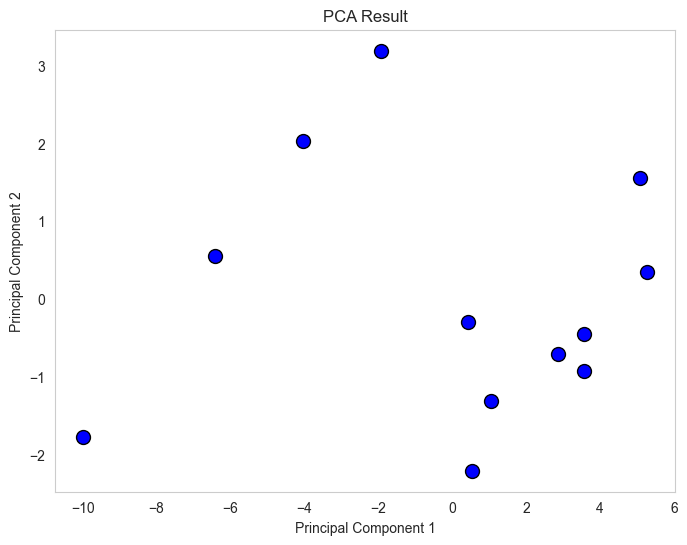

In [25]:
# 可视化主成分
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolors='k', s=100)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [26]:
# 如果你想查看每个主成分与原始特征的关系，可以查看PCA的特征向量
print(pd.DataFrame(pca.components_, columns=df_combined.columns[1:], index=['PC1', 'PC2']))

        sex_F     sex_M     sex_T  age_TOTAL  age_Y18-64  age_Y_GE65  \
PC1  0.217989  0.217903  0.218836   0.218836    0.217575    0.211772   
PC2 -0.023213  0.027006 -0.005490  -0.005490   -0.023745   -0.046870   

     age_Y_LT18  income_QU1  income_QU2  income_QU3  ...  tenure_OWN_L  \
PC1    0.177367    0.194175    0.209545     0.18825  ...      0.034161   
PC2    0.227565   -0.244757    0.114565     0.28598  ...      0.595591   

     tenure_OWN_NL  tenure_RENT_FR  tenure_OWN  urban_DEG1  urban_DEG2  \
PC1       0.190963        0.188007    0.207809    0.211790    0.215539   
PC2       0.116778       -0.263857   -0.187928   -0.149558    0.080149   

     urban_DEG3  household_A1  household_A2  household_A_GE3  
PC1    0.206917      0.213226      0.211919         0.153084  
PC2    0.159309     -0.118589      0.052492        -0.354876  

[2 rows x 25 columns]


PC1: The coefficients of various features such as sex_* (gender), age_* (age), and urban_* (urbanization level) are relatively high, indicating that these features play a significant role in the first principal component.

PC2: Features like tenure_OWN_L (ownership), income_* (income) have larger positive or negative contributions, suggesting that these features are more important in the second principal component.

## Modeling

### LSTM Model

#### Build the model

In [29]:
# use PC1 to predict the time period
y = pca_result[:, 0]

# change the data to a format suitable for LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

look_back = 3  # chose the number of time steps to look back
X, y = create_dataset(y, look_back)

# split the data into training and testing sets
train_size = int(len(X) * 0.8) # 80% of the data for training
X_train, X_test = X[:train_size], X[train_size:] # 20% of the data for testing
y_train, y_test = y[:train_size], y[train_size:] # 20% of the data for testing

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# build the LSTM model
model = Sequential() # Sequential model
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1))) # first LSTM layer with 50 units and return_sequences=True
model.add(LSTM(units=50)) # second LSTM layer with 50 units
model.add(Dense(1))  # output layer

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error') # use mean squared error as the loss function and adam as the optimizer
model.fit(X_train, y_train, epochs=50, batch_size=32) # train the model

# make predictions
predictions = model.predict(X_test)

2024-10-02 18:26:40.112680: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 23.3234
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 23.1761
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 23.0316
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 22.8892
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 22.7481
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 22.6079
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 22.4678
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 22.3275
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 22.1866
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 22.0447
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 21.9017
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 21.7575
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 21.6121
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 21.4657
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 21.3186
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━

#### Evaluate the model

In [30]:
# calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# calculate the root mean squared error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 1.7373379885461708
Root Mean Squared Error: 1.3180811767665035


Lower values of MSE and RMSE indicate better model performance, as they represent smaller errors between the predicted and actual values.

The RMSE of 1.3181 suggests that, on average, the model's predictions are off by approximately 1.32 units from the true values. The acceptability of this value depends on the scale of the data being modeled. For example, if the data values are small (e.g., percentages), an RMSE of 1.32 may be considered large. However, if the data values are large (e.g., revenue or counts), this RMSE may be acceptable.

Benchmarking: To assess the performance of the model, it is important to compare the RMSE with that of other models or a baseline model. If the RMSE is lower than the benchmark or other alternative models, the model can be considered to perform well.